In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df.job_posted_date=pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

df_US = df[df['job_country']=='United States'].copy()

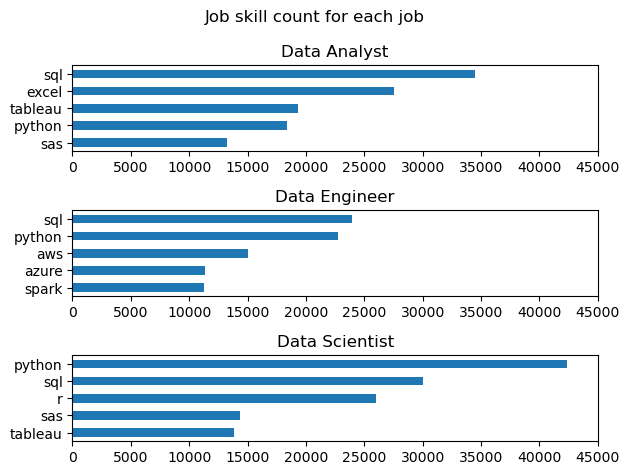

In [4]:
df_skills = df_US.copy()
df_skills = df_skills.explode('job_skills')

df_skills_count = df_skills.groupby(['job_title_short','job_skills']).size().sort_values(ascending=False).reset_index(name='skill_count')



job_titles = df_skills_count.job_title_short.unique().tolist()
job_titles = sorted(job_titles[:3])

fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    df_plt = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plt.plot(kind='barh', x='job_skills', y='skill_count', ax = ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,45000)

plt.suptitle('Job skill count for each job')
plt.tight_layout()


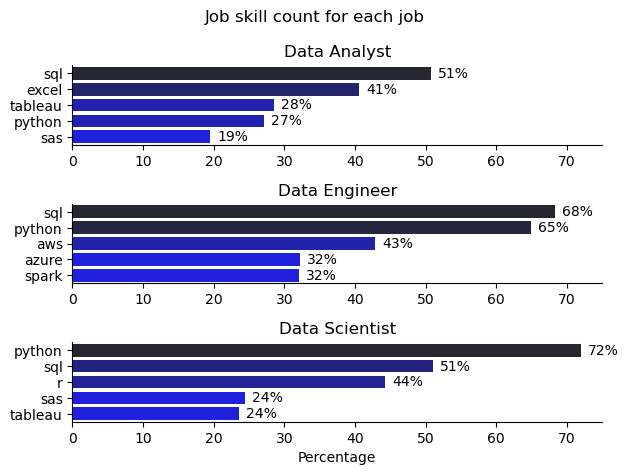

In [23]:
import seaborn as sns

df_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skill_perc = pd.merge(df_skills_count,df_title_count,how='left',on='job_title_short')
df_skill_perc['skill_perc'] = df_skill_perc.skill_count/df_skill_perc.jobs_total*100

fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    df_plt = df_skill_perc[df_skill_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plt,x='skill_perc', y='job_skills',ax = ax[i], hue='skill_count', palette='dark:b_r')
    sns.despine()
    #df_plt.plot(kind='barh', x='job_skills', y='skill_perc', ax = ax[i], title= job_title)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,75)

    for n, v in enumerate(df_plt['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

ax[2].set_xlabel('Percentage')
plt.suptitle('Job skill count for each job')
plt.tight_layout()
